In [11]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [13]:
ny_lines = gpd.read_file("../nyc_metro/MTA-New-York-city-Subway.kml")
ny_lines = ny_lines.sort_values(by="Name")
subway = pd.concat([ny_lines[ny_lines['Name'].str.match(r'[\w]+[ ]Line')], ny_lines[ny_lines['Name']=="J and Z lines"]])
subway = gpd.GeoDataFrame(subway)
ind= ny_lines[ny_lines["Name"].str.contains("IND")]
irt= ny_lines[ny_lines["Name"].str.contains("IRT")]
bmt= ny_lines[ny_lines["Name"].str.contains("BMT")]

ny_lines['train'] = train = np.array([
    "1 Train",          # 1 Line
    "4 Train",          # 4 Line
    "S Train",          # 42nd Street Shuttle
    "7 Train",          # 7 Line
    "7 Train",          # 7 Line Extension
    "A Train",          # A Line
    "B Train",          # B Line
    ["N Train", "Q Train", "W Train"],  # BMT Astoria Line
    ["B Train", "Q Train"],             # BMT Brighton Line
    "R Train",          # BMT Fourth Avenue Line
    "S Train",          # BMT Franklin Shuttle Line
    ["R Train", "W Train"], # BMT Montague St Line
    "N Train",          # BMT Sea Beach Line
    "D Train",          # D Line
    "E Train",          # E Line
    "F Train",          # F Line
    "G Train",          # G Line
    None,               # IND Chelsea Line (No regular service)
    "A Train",          # IND Far Rockaway Line
    "F Train",          # IND Queens Blvd Line Extension
    ["R Train", "M Train"], # IND Queens Blvd Local
    "S Train",          # IND Rockaway Park Line
    ["2 Train", "3 Train"],  # IRT Clark Street Tunnel Line
    None,               # IRT College Point Line (No regular service)
    "5 Train",          # IRT Dyre Avenue Line
    ["2 Train", "3 Train"],  # IRT Eastern Parkway Line
    ["2 Train", "3 Train"],  # IRT Lenox Line and White Plains Rd Line
    ["2 Train", "5 Train"],  # IRT Nostrand Avenue
    "6 Train",          # IRT Pelham Line
    ["J Train", "Z Train"],  # J and Z Lines
    "L Train",          # L Line
    "Q Train",          # Q Line
    None                # Via New Jersey (No regular service)
], dtype=object)
ny_lines = ny_lines.dropna().explode('train')
ny_lines['train'] = ny_lines['train'].str.replace(" Train", "")
ny_lines[['Name', 'Description', "train"]].head(10)
#ny_lines['train'] = ny_lines[''].str.split("/")

,Name,Description,train
7,1 Line,1 Train 7th Avenue/Broadway Local,1
9,4 Line,,4
27,42nd Street shuttle,IRT 42nd Street shuttle,S
16,7 Line,IRT Flushing Line and IRT Flushing Line Extension,7
2,7 Line Extension,,7
12,A Line,,A
5,B Line,,B
18,BMT Astoria Line,BMT Astoria Line,N
18,BMT Astoria Line,BMT Astoria Line,Q
18,BMT Astoria Line,BMT Astoria Line,W


<Axes: >

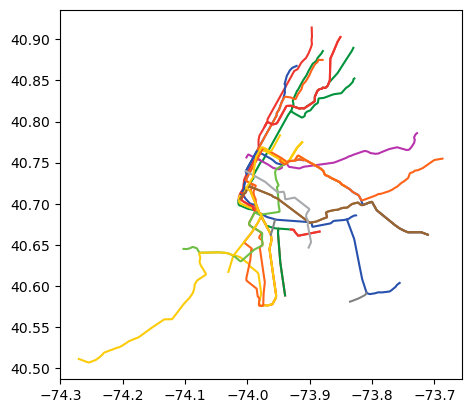

In [14]:
train_colors = {
    "1": "#EE352E",  # Red
    "2": "#EE352E",  # Red
    "3": "#EE352E",  # Red
    "4": "#00933C",  # Green
    "5": "#00933C",  # Green
    "6": "#00933C",  # Green
    "7": "#B933AD",  # Purple
    "A": "#2850AD",  # Blue
    "B": "#FF6319",  # Orange
    "D": "#FF6319",  # Orange
    "E": "#2850AD",  # Blue
    "F": "#FF6319",  # Orange
    "G": "#6CBE45",  # Light Green
    "J": "#996633",  # Brown
    "L": "#A7A9AC",  # Gray
    "M": "#FF6319",  # Orange
    "N": "#FCCC0A",  # Yellow
    "Q": "#FCCC0A",  # Yellow
    "R": "#FCCC0A",  # Yellow
    "S": "#808183",  # Dark Gray (Shuttles)
    "W": "#FCCC0A",  # Yellow
    "Z": "#996633",  # Brown
}
ny_lines['color'] = ny_lines['train'].map(train_colors)
ny_lines.plot(color=ny_lines["color"])

In [15]:
ny_lines.to_file("../geojson/nyc_metro/ny_lines_fixed.geojson")